# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import io

# Read csv File

In [2]:
with open('data/products.csv', 'r', encoding='utf-8') as f:
    raw_data = f.read()

In [3]:
df = pd.read_csv(io.StringIO(raw_data), on_bad_lines='skip', quotechar='"')

In [4]:
df

,product_name,our_price,category,current_stock,restock_threshold,Unnamed: 5,Unnamed: 6
0,Organic Coffee Beans (1lb),14.99,Beverages,45,25.0,2024-11-15,Be
1,Premium Green Tea (50 bags),8.99,Beverages,32,20.0,2024-11-10,Te
2,Masala Chai Mix (12oz),9.99,beverages,18,15.0,2024-11-18,Spice W
3,Yerba Mate Loose Leaf (1lb),$12.99,Beverages,5,10.0,2024-11-01,S
4,Hot Chocolate Mix (1lb),7.99,Beverages,50,30.0,11/12/2024,Sweet
5,Earl Grey Tea (100 bags),11.99,beverages,28,25.0,2024-11-14,Tea
6,Espresso Beans (1lb),16.99,Beverages,22,20.0,2024-11-16,Bean Bro
7,Chamomile Tea (30 bags),6.99,Tea,12,15.0,2024-11-05,Tea Time Imp
8,Matcha Green Tea Powder (4oz),19.99,Beverages,8,NaN,2024-11-17,Te
9,Decaf Coffee Beans (1lb),15.99,Beverages,15,15.0,2024-11-13,Bean


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       12 non-null     object 
 1   our_price          12 non-null     object 
 2   category           12 non-null     object 
 3   current_stock      12 non-null     object 
 4   restock_threshold  11 non-null     float64
 5   Unnamed: 5         12 non-null     object 
 6   Unnamed: 6         12 non-null     object 
dtypes: float64(1), object(6)
memory usage: 804.0+ bytes


# Data Cleaning

In [6]:
# Drop the last column of the DataFrame 
# (this does not contribute much to the analysis)

df.drop(columns=df.columns[-1], inplace=True)
df

,product_name,our_price,category,current_stock,restock_threshold,Unnamed: 5
0,Organic Coffee Beans (1lb),14.99,Beverages,45,25.0,2024-11-15
1,Premium Green Tea (50 bags),8.99,Beverages,32,20.0,2024-11-10
2,Masala Chai Mix (12oz),9.99,beverages,18,15.0,2024-11-18
3,Yerba Mate Loose Leaf (1lb),$12.99,Beverages,5,10.0,2024-11-01
4,Hot Chocolate Mix (1lb),7.99,Beverages,50,30.0,11/12/2024
5,Earl Grey Tea (100 bags),11.99,beverages,28,25.0,2024-11-14
6,Espresso Beans (1lb),16.99,Beverages,22,20.0,2024-11-16
7,Chamomile Tea (30 bags),6.99,Tea,12,15.0,2024-11-05
8,Matcha Green Tea Powder (4oz),19.99,Beverages,8,NaN,2024-11-17
9,Decaf Coffee Beans (1lb),15.99,Beverages,15,15.0,2024-11-13


In [7]:
# Replace the 'out of stock' values in the 'current_stock' column with 0
df['current_stock'] = df['current_stock'].replace('out of stock', 0)
df

,product_name,our_price,category,current_stock,restock_threshold,Unnamed: 5
0,Organic Coffee Beans (1lb),14.99,Beverages,45,25.0,2024-11-15
1,Premium Green Tea (50 bags),8.99,Beverages,32,20.0,2024-11-10
2,Masala Chai Mix (12oz),9.99,beverages,18,15.0,2024-11-18
3,Yerba Mate Loose Leaf (1lb),$12.99,Beverages,5,10.0,2024-11-01
4,Hot Chocolate Mix (1lb),7.99,Beverages,50,30.0,11/12/2024
5,Earl Grey Tea (100 bags),11.99,beverages,28,25.0,2024-11-14
6,Espresso Beans (1lb),16.99,Beverages,22,20.0,2024-11-16
7,Chamomile Tea (30 bags),6.99,Tea,12,15.0,2024-11-05
8,Matcha Green Tea Powder (4oz),19.99,Beverages,8,NaN,2024-11-17
9,Decaf Coffee Beans (1lb),15.99,Beverages,15,15.0,2024-11-13


In [8]:
# Convert the 'current_stock' column to an integer type
df['current_stock'] = pd.to_numeric(df['current_stock'], errors='coerce').astype('Int64')
df

,product_name,our_price,category,current_stock,restock_threshold,Unnamed: 5
0,Organic Coffee Beans (1lb),14.99,Beverages,45,25.0,2024-11-15
1,Premium Green Tea (50 bags),8.99,Beverages,32,20.0,2024-11-10
2,Masala Chai Mix (12oz),9.99,beverages,18,15.0,2024-11-18
3,Yerba Mate Loose Leaf (1lb),$12.99,Beverages,5,10.0,2024-11-01
4,Hot Chocolate Mix (1lb),7.99,Beverages,50,30.0,11/12/2024
5,Earl Grey Tea (100 bags),11.99,beverages,28,25.0,2024-11-14
6,Espresso Beans (1lb),16.99,Beverages,22,20.0,2024-11-16
7,Chamomile Tea (30 bags),6.99,Tea,12,15.0,2024-11-05
8,Matcha Green Tea Powder (4oz),19.99,Beverages,8,NaN,2024-11-17
9,Decaf Coffee Beans (1lb),15.99,Beverages,15,15.0,2024-11-13


Now there's additional information about the products in the 'product_name' column. We can extract this information to enrich the DataFrame.

In [9]:
# Extract the number of units and the unit of measure from 'product_name'

df['units'] = df['product_name'].str.extract(r'\((\d+)\s*([a-zA-Z]+)\)')[0]
df['unit_of_measure'] = df['product_name'].str.extract(r'\((\d+)\s*([a-zA-Z]+)\)')[1]

# drop the extracted information from 'product_name'
df['product_name'] = df['product_name'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()
df

,product_name,our_price,category,current_stock,restock_threshold,Unnamed: 5,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,lb
1,Premium Green Tea,8.99,Beverages,32,20.0,2024-11-10,50,bags
2,Masala Chai Mix,9.99,beverages,18,15.0,2024-11-18,12,oz
3,Yerba Mate Loose Leaf,$12.99,Beverages,5,10.0,2024-11-01,1,lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,11/12/2024,1,lb
5,Earl Grey Tea,11.99,beverages,28,25.0,2024-11-14,100,bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,bags
8,Matcha Green Tea Powder,19.99,Beverages,8,NaN,2024-11-17,4,oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,lb


In [10]:
# Delete the $ symbol from the 'our_price' column and convert it to a float
df['our_price'] = df['our_price'].replace({'\$': ''}, regex=True).astype(float)
df

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ACER\AppData\Local\Temp\ipykernel_13492\3036050088.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['our_price'] = df['our_price'].replace({'\$': ''}, regex=True).astype(float)


,product_name,our_price,category,current_stock,restock_threshold,Unnamed: 5,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,lb
1,Premium Green Tea,8.99,Beverages,32,20.0,2024-11-10,50,bags
2,Masala Chai Mix,9.99,beverages,18,15.0,2024-11-18,12,oz
3,Yerba Mate Loose Leaf,12.99,Beverages,5,10.0,2024-11-01,1,lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,11/12/2024,1,lb
5,Earl Grey Tea,11.99,beverages,28,25.0,2024-11-14,100,bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,bags
8,Matcha Green Tea Powder,19.99,Beverages,8,NaN,2024-11-17,4,oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,lb


In [11]:
# rename the 'Unnamed: 5' column to 'date'
df.rename(columns={'Unnamed: 5': 'date'}, inplace=True)
df

,product_name,our_price,category,current_stock,restock_threshold,date,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,lb
1,Premium Green Tea,8.99,Beverages,32,20.0,2024-11-10,50,bags
2,Masala Chai Mix,9.99,beverages,18,15.0,2024-11-18,12,oz
3,Yerba Mate Loose Leaf,12.99,Beverages,5,10.0,2024-11-01,1,lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,11/12/2024,1,lb
5,Earl Grey Tea,11.99,beverages,28,25.0,2024-11-14,100,bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,bags
8,Matcha Green Tea Powder,19.99,Beverages,8,NaN,2024-11-17,4,oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,lb


In [12]:
# import the created function to parse the date
from src.utils import parse_date

In [13]:
# apply the function to the 'date' column
df['date'] = df['date'].apply(parse_date)
df

,product_name,our_price,category,current_stock,restock_threshold,date,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,lb
1,Premium Green Tea,8.99,Beverages,32,20.0,2024-11-10,50,bags
2,Masala Chai Mix,9.99,beverages,18,15.0,2024-11-18,12,oz
3,Yerba Mate Loose Leaf,12.99,Beverages,5,10.0,2024-11-01,1,lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,2024-11-12,1,lb
5,Earl Grey Tea,11.99,beverages,28,25.0,2024-11-14,100,bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,bags
8,Matcha Green Tea Powder,19.99,Beverages,8,NaN,2024-11-17,4,oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,lb


In [14]:
# Standardize the values of the 'category' and 'unit_of_measure' columns
df['category'] = df['category'].str.title()
df['unit_of_measure'] = df['unit_of_measure'].str.title()
df['product_name'] = df['product_name'].str.title()
df

,product_name,our_price,category,current_stock,restock_threshold,date,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,Lb
1,Premium Green Tea,8.99,Beverages,32,20.0,2024-11-10,50,Bags
2,Masala Chai Mix,9.99,Beverages,18,15.0,2024-11-18,12,Oz
3,Yerba Mate Loose Leaf,12.99,Beverages,5,10.0,2024-11-01,1,Lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,2024-11-12,1,Lb
5,Earl Grey Tea,11.99,Beverages,28,25.0,2024-11-14,100,Bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,Lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,Bags
8,Matcha Green Tea Powder,19.99,Beverages,8,NaN,2024-11-17,4,Oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,Lb


In [15]:
# Change the category of the products that contain the word 'Tea' in the 'product_name' column to 'Tea'
df.loc[df['product_name'].str.contains('Tea', case=False, na=False), 'category'] = 'Tea'

df


,product_name,our_price,category,current_stock,restock_threshold,date,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,Lb
1,Premium Green Tea,8.99,Tea,32,20.0,2024-11-10,50,Bags
2,Masala Chai Mix,9.99,Beverages,18,15.0,2024-11-18,12,Oz
3,Yerba Mate Loose Leaf,12.99,Beverages,5,10.0,2024-11-01,1,Lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,2024-11-12,1,Lb
5,Earl Grey Tea,11.99,Tea,28,25.0,2024-11-14,100,Bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,Lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,Bags
8,Matcha Green Tea Powder,19.99,Tea,8,NaN,2024-11-17,4,Oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,Lb


# Missing Values Imputation

In [16]:
# Filter the rows where 'category' is 'Tea'
mean_restock_tea = int(df.loc[df['category'] == 'Tea', 'restock_threshold'].mean())

# fill the missing values in the 'restock_threshold' column with the mean of the 'restock_threshold' for the 'Tea' category
df.loc[(df['category'] == 'Tea') & (df['restock_threshold'].isna()), 'restock_threshold'] = mean_restock_tea

df

,product_name,our_price,category,current_stock,restock_threshold,date,units,unit_of_measure
0,Organic Coffee Beans,14.99,Beverages,45,25.0,2024-11-15,1,Lb
1,Premium Green Tea,8.99,Tea,32,20.0,2024-11-10,50,Bags
2,Masala Chai Mix,9.99,Beverages,18,15.0,2024-11-18,12,Oz
3,Yerba Mate Loose Leaf,12.99,Beverages,5,10.0,2024-11-01,1,Lb
4,Hot Chocolate Mix,7.99,Beverages,50,30.0,2024-11-12,1,Lb
5,Earl Grey Tea,11.99,Tea,28,25.0,2024-11-14,100,Bags
6,Espresso Beans,16.99,Beverages,22,20.0,2024-11-16,1,Lb
7,Chamomile Tea,6.99,Tea,12,15.0,2024-11-05,30,Bags
8,Matcha Green Tea Powder,19.99,Tea,8,18.0,2024-11-17,4,Oz
9,Decaf Coffee Beans,15.99,Beverages,15,15.0,2024-11-13,1,Lb


# KPIS

In [22]:
# Products out of stock
out_of_stock_products = df[df['current_stock'] == 0]['product_name']
print(f"Products out of stock ({len(out_of_stock_products)}):")
print(out_of_stock_products.to_list())

Products out of stock (1):
['Mint Tea']


In [23]:
# Products that need restocking
restock_needed_products = df[df['current_stock'] < df['restock_threshold']]['product_name']
print(f"\nProducts that need restocking ({len(restock_needed_products)}):")
print(restock_needed_products.to_list())


Products that need restocking (4):
['Yerba Mate Loose Leaf', 'Chamomile Tea', 'Matcha Green Tea Powder', 'Mint Tea']


In [35]:
from src.analysis import plot_inventory_kpis

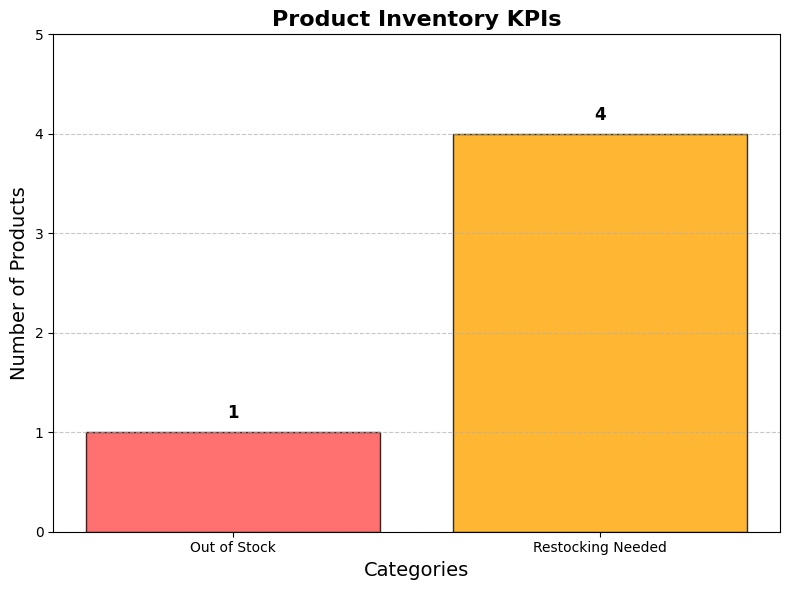

In [36]:
plot_inventory_kpis(out_of_stock_products, restock_needed_products)

In [37]:
df['total_value'] = df['our_price'] * df['current_stock']
total_inventory_value = df['total_value'].sum()
print(f'Total inventory value: ${total_inventory_value:.2f}')


Total inventory value: $3065.46
